# Notebook dedicated to obtain the expectend event rate of solar $\nu_e$ at SNO+

In [44]:
import numpy as np
import pickle

import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.integrate import simpson

from cross_section import cross_sec_ES_nu_e, integrated_sigma

# Load PSelmaa Data and Normalized Flux Data

In [45]:
# =========  Directories =========

# ------- Normalized Flux -------
flux_dir = 'C:/Users/Acer~/jupyter notebooks/Flux Prediction/normalized solar spectra/data/'
flux_fname_pattern = 'norm_spec_solar_'

# ------- Pee -------
Pee_dir = 'C:/Users/Acer~/jupyter notebooks/Flux Prediction/PSelmaa out/'
Pee_fname_pattern = 'pselmaa_test_sun_pee_'

#  ======== Choose the reaction that produces Nue and the SSM ========
reaction = 'be7'
ssm = 'B16_GS98_'

# ======== Open Files ========

# ---------- Norm Flux ----------
with open(flux_dir + flux_fname_pattern + reaction + '.pickle', 'rb') as handle:
    flux_data = pickle.load(handle)
S_norm = np.array(flux_data['norm_count'])
S_energy = np.array(flux_data['energy'])

# ---------- Pee ----------
PSelmaa_data = np.loadtxt(Pee_dir + Pee_fname_pattern + ssm + reaction + '.txt', skiprows=1)
Pee = PSelmaa_data[:,1]
Pee_energy = PSelmaa_data[:,0]

In [46]:
S_energy

array([0.383, 0.861])

# Create the Interpolation Points 

Define a common energy axis values between Pee and the Flux to perform the numerical integration .

In [40]:
# ====== Define the new energy grid ======

# Energy step
dE = 0.01
# Energy grid limits: Ensure that the values of the flux and Pee are within the ranges
E_min = max(min(S_energy), min(Pee_energy))
E_max = min(max(S_energy), max(Pee_energy))    


E_grid = np.arange(E_min, E_max, dE)

# ====== Interpolation ======

# Functions that interpolates the new points
f_Pee = interp1d(Pee_energy, Pee, kind='linear', bounds_error=False, fill_value=0)
Pee_interp = f_Pee(E_grid) # New Points Evaluation

try:
    f_S = interp1d(S_energy, S_norm, kind='linear', bounds_error=False, fill_value=0)
    S_interp = f_S(E_grid)
    
except ValueError:
    Pee_interp = f_Pee(S_energy)
    print(f'It seems that the spectrum is mono-energetic at {S_energy[0]} (MeV), then the survival probability \n will be only evaluated at the energy point. If this is not the case, review the code.')

It seems that the spectrum is mono-energetic at 1.442 (MeV), then the survival probability 
 will be only evaluated at the energy point. If this is not the case, review the code.


# Case of mono-energetic neutrinos

## Obtain the Cross Section Values

In [41]:
cross_sec_nue = cross_sec_ES_nu_e(S_energy[0])
cross_sec_numu = cross_sec_ES_nu_e(S_energy[0], flavor = 'numu' )

## Compute the Expected event rate

In [42]:
flux_pep = 1.43e8                   #cm^-2 s^-1
Spec = S_norm[0] * flux_pep
n_targets = 2.622e32

R = n_targets*Spec*(Pee_interp*cross_sec_nue + (1-Pee_interp)*cross_sec_numu)
R

array([0.00025802])

In [43]:
convert_to_365days_factor = 1/(365*24*3600)
(R/convert_to_365days_factor)

array([8136.8851754])

# Case of continuous neutrino's spectrum

## Obtain the Cross Section Values

In [27]:
cross_sec_nue = []
cross_sec_numu = []

for energy_i in E_grid:
    cross_sec_nue.append(integrated_sigma(energy_i))
    cross_sec_numu.append(integrated_sigma(energy_i, flavor = 'numu' ))
    
cross_sec_nue = np.array(cross_sec_nue)
cross_sec_numu = np.array(cross_sec_numu)

## Compute the integrand to obtain the event rate

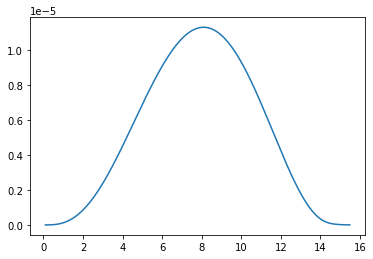

In [28]:
flux_8b = 5.03e6                   #cm^-2 s^-1
Spec = S_interp * flux_8b
n_targets = 2.622e32

integrand_function = n_targets*Spec*(Pee_interp*cross_sec_nue + (1-Pee_interp)*cross_sec_numu)

plt.plot(E_grid, integrand_function)
plt.show()

In [29]:
R = simpson(integrand_function, x = E_grid)
R

7.93170353276304e-05

In [30]:
convert_to_365days_factor = 1/(365*24*3600)
(R/convert_to_365days_factor)

2501.3420260921525

In [31]:
2501.3420260921525/956

2.6164665544896994